# 타이타닉 생존자 예측 ML 구현

In [1]:
# 데이터 전처리
# NUll 처리, 불필요한 속성제거, 인코딩 수행

# 모델학습 및 검증/ 예측 /평가
# 결정트리, 랜덤포레스트 , 로지스틱 회귀, K-Fold 교차검증

## import

In [3]:
# import
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder

## 데이터 불러오기

In [8]:
# 데이터 불러오기
titanic = pd.read_csv('Datasets/titanic_train.csv')

## 데이터 확인

In [9]:
# 데이터 확인
titanic.head(3)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S


## 데이터 정보

In [10]:
# 데이터 정보
titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [11]:
titanic.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


## Null 컬럼들에 대한 처리

In [20]:
titanic.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [26]:
titanic['Age'].fillna(titanic['Age'].mean(), inplace=True)
titanic['Cabin'].fillna('N', inplace=True)
titanic['Embarked'].fillna('N', inplace=True)
titanic_df = pd.DataFrame(titanic)
titanic_df.isnull().sum()

C:\Users\user\AppData\Local\Temp\ipykernel_52660\114735143.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  titanic['Age'].fillna(titanic['Age'].mean(), inplace=True)


PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Cabin          0
Embarked       0
dtype: int64

## 주요 컬럼 EDA

In [31]:
# Object 컬럼 타입 추출
print(titanic_df.dtypes)
titanic_df.dtypes[titanic_df.dtypes == 'object'].index.tolist()

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object


['Name', 'Sex', 'Ticket', 'Cabin', 'Embarked']

In [32]:
titanic_df.groupby(['Sex', 'Survived'])['Survived'].count()

Sex     Survived
female  0            81
        1           233
male    0           468
        1           109
Name: Survived, dtype: int64

<Axes: xlabel='Sex', ylabel='Survived'>

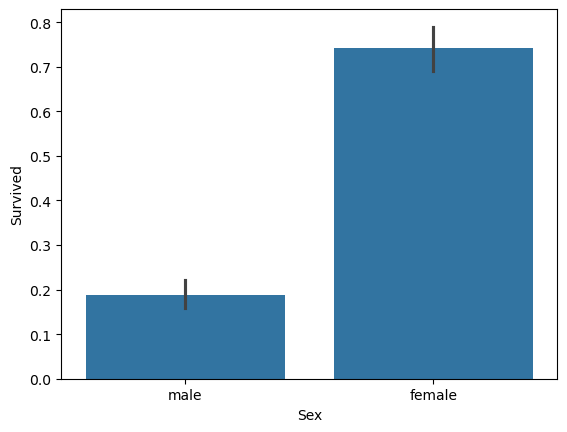

In [34]:
sns.barplot(x= "Sex", y= "Survived",data = titanic_df)

<Axes: xlabel='Pclass', ylabel='Survived'>

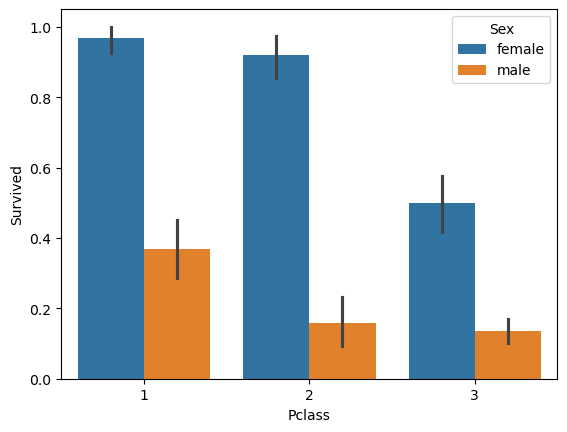

In [36]:
sns.barplot(x="Pclass", y = "Survived", hue="Sex", data = titanic_df )

## 함수로 만들어보기

In [45]:
from sklearn.preprocessing import LabelEncoder

# Null 처리
def fillna(df):
    df['Age'].fillna(df['Age'].mean(), inplace = True)
    df['Cabin'].fillna('N', inplace = True)
    df['Embarked'].fillna('N', inplace = True)

    return df

# 불필요한 피처 제거
def drop_feature(df):
    df.drop(['PassengerId','Name','Ticket'], axis=1, inplace=True)
    return df

# 레이블 인코딩 수행
def format_features(df):
    df['Cabin'] == df['Cabin'].str[:1]
    features = ['Cabin', 'Sex', 'Embarked']
    for feature in features:
        le = LabelEncoder()
        le = le.fit(df[feature])
        df[feature] = le.transform(df[feature])
    return df

def transform_features(df):
    df = fillna(df)
    df = drop_feature(df)
    df = format_features(df)
    return df

In [46]:
titanic_df = pd.read_csv('Datasets/titanic_train.csv')
y_titanic_df = titanic_df[['Survived']]
X_titanic_df = titanic_df.drop('Survived', axis=1, inplace=False)

X_titanic_df = transform_features(X_titanic_df)

C:\Users\user\AppData\Local\Temp\ipykernel_52660\238214453.py:5: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Age'].fillna(df['Age'].mean(), inplace = True)
C:\Users\user\AppData\Local\Temp\ipykernel_52660\238214453.py:6: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For examp

In [47]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X_titanic_df, y_titanic_df, test_size = 0.2, random_state = 42)

In [49]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

# 결정트리 RandomForest, 로지스틱 회귀
dt_clf =DecisionTreeClassifier(random_state=11)
rf_clf = RandomForestClassifier(random_state=11)
lr_clf = LogisticRegression(solver='liblinear')

# DecisionTree 학습/예측 /평가
dt_clf.fit(X_train, y_train)
dt_pred = dt_clf.predict(X_test)
print("Decision Tree Accuracy: {0:.2f}".format(accuracy_score(y_test, dt_pred)))

# RandomForest 학습/ 예측 /평가
rf_clf.fit(X_train, y_train)
rf_pred = rf_clf.predict(X_test)
print("Random Forest Accuracy: {0: .2f}".format(accuracy_score(y_test, rf_pred)))

# Logistic 학습 / 예측 /평가
lr_clf.fit(X_train, y_train)
lr_pred = lr_clf.predict(X_test)
print("Logistic Regression Accuracy: {0:.2f}".format(accuracy_score(y_test, lr_pred)))

Decision Tree Accuracy: 0.82
Random Forest Accuracy:  0.80
Logistic Regression Accuracy: 0.79


c:\Users\user\anaconda3\envs\namduhus_GPU\Lib\site-packages\sklearn\base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
c:\Users\user\anaconda3\envs\namduhus_GPU\Lib\site-packages\sklearn\utils\validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
